# Anomaly Detection Algorithms

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#Introduction" role="tab" aria-controls="settings">Introduction<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#One-Class-SVM" role="tab" aria-controls="settings">One-Class SVM<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Isolation-Forests" role="tab" aria-controls="settings">Isolation Forests<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Elliptic-Envelope" role="tab" aria-controls="settings">Elliptic Envelope<span class="badge badge-primary badge-pill"></span></a> 
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#DBSCAN-(Density-Based-Spatial-Clustering-of-Applications-with-Noise)" role="tab" aria-controls="settings">DBSCAN<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#PCA-based-Anomaly-Detection" role="tab" aria-controls="settings">PCA-based-Anomaly-Detection<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Local-Outlier-Factor" role="tab" aria-controls="settings">Local Outlier Factor<span class="badge badge-primary badge-pill"></span></a>
        <a class="list-group-item list-group-item-action" data-toggle="list" href="#Feature-Bagging" role="tab" aria-controls="settings">Feature Bagging<span class="badge badge-primary badge-pill"></span></a>
        <a class="list-group-item list-group-item-action" data-toggle="list" href="#KNN-(K---Nearest-Neighbors-)" role="tab" aria-controls="settings">KNN<span class="badge badge-primary badge-pill"></span></a>
        <a class="list-group-item list-group-item-action" data-toggle="list" href="#HBOS-(Histogram-based-Outlier-Detection)" role="tab" aria-controls="settings">HBOS<span class="badge badge-primary badge-pill"></span></a>
        <a class="list-group-item list-group-item-action" data-toggle="list" href="#CBLOF-(Cluster-based-Local-Outlier-Factor)" role="tab" aria-controls="settings">CBLOF<span class="badge badge-primary badge-pill"></span></a>
    </div>

# Introduction

What is Anomaly?

Anomalies are defined as events that deviate from the standard, happen rarely, and do not follow the rest of the “pattern”. Anomalies are also referred to as outliers, surprise, aberrant, deviation, peculiarity, etc. 

<div>
    
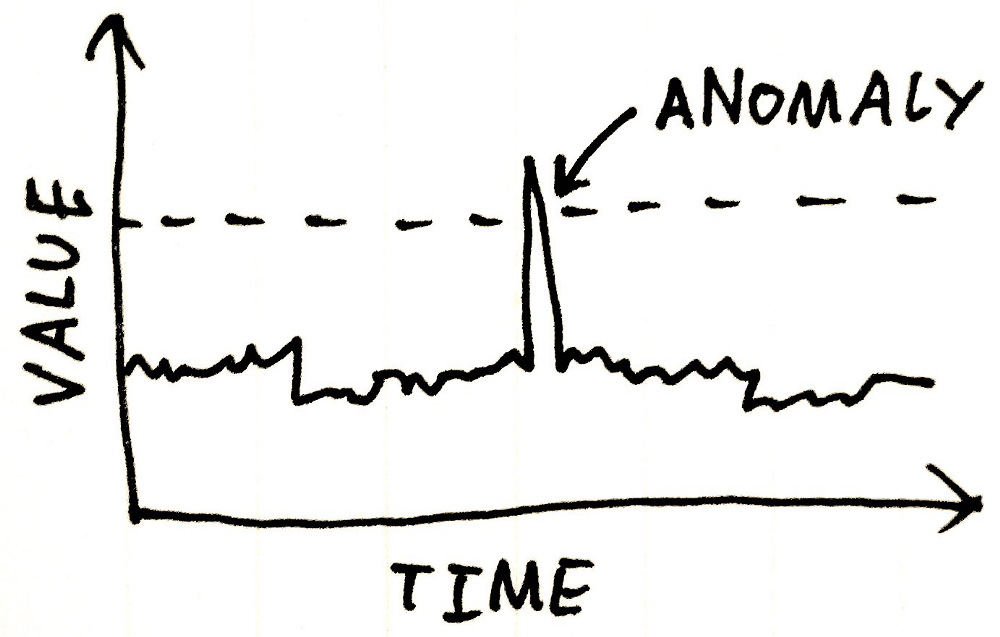

</div>


Real-time Applications: 

Intrusion detection, fraud detection, system health monitoring, event detection in sensor networks, and detecting eco-system disturbances

Challenges in Anomaly Detection:

•	The difficulty to achieve high anomaly detection recall rate

•	Anomaly detection in high-dimensional space - Anomalies often exhibit evident abnormal characteristics in a low-dimensional space yet become hidden and unnoticeable in a high-dimensional space 

•	Due to the difficulty and cost of collecting large-scale labelled anomaly data, it is important to have data-efficient learning of normality/abnormality

**Unsupervised methods are the best choice for anomaly detection, since they recognize new and unknown objects whereas supervised methods can detect only pre-known abnormal cases. 

## **Segmentation of Outlier detection Algorithm**

* **_Linear Models for Outlier Detection:_**

 **PCA:** Principal Component Analysis use the sum of weighted projected distances to the eigenvector hyperplane as the outlier outlier scores)
 
 **MCD:** Minimum Covariance Determinant (use the mahalanobis distances as the outlier scores)
 
 **OCSVM:** One-Class Support Vector Machines


* **_Proximity-Based Outlier Detection Models:_**

 **LOF:** Local Outlier Factor
 
 **CBLOF:** Clustering-Based Local Outlier Factor
 
 **kNN:** k Nearest Neighbors (use the distance to the kth nearest neighbor as the outlier score)
 
 **Median kNN Outlier Detection** (use the median distance to k nearest neighbors as the outlier score)
 
 **HBOS:** Histogram-based Outlier Score
 
 
* **_Probabilistic Models for Outlier Detection:_**

 **ABOD:** Angle-Based Outlier Detection
 

* **_Outlier Ensembles and Combination Frameworks_**

 **Isolation Forest**

 **Feature Bagging**

 **LSCP**

# Data Preprocessing

**Step 1:** Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import quantile, where, random
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, precision_recall_curve, average_precision_score, roc_curve,roc_auc_score,auc

**Step 2:** Loading and exploring the data

In [3]:
data = pd.read_csv(r'satellite_data_updated.csv')

In [4]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,46,40,119,139,42,30,135,157,42,30,1
1,47,37,119,133,44,34,124,143,44,34,1
2,80,95,100,74,64,64,104,96,46,36,1
3,56,51,72,60,59,54,72,60,59,51,1
4,44,34,129,140,44,34,124,136,44,34,1


In [5]:
X = data.drop('y',axis=1)
y = data['y']

**Step 3:** Segregating the data into train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [7]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3570, 10), (1530, 10), (3570,), (1530,))

**Step 4:** Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train_s = scaler.fit_transform(X_train)
X_train_s = pd.DataFrame(X_train_s, columns = X_train.columns)

X_test_s = scaler.fit_transform(X_test)
X_test_s = pd.DataFrame(X_test_s, columns = X_test.columns)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

In [10]:
scaler.fit_transform(X_train)

array([[0.90163934, 0.81651376, 0.88311688, ..., 0.43243243, 0.87096774,
        0.82178218],
       [0.49180328, 0.40366972, 0.2987013 , ..., 0.18918919, 0.46774194,
        0.4950495 ],
       [0.36065574, 0.3853211 , 0.07792208, ..., 0.0990991 , 0.40322581,
        0.47524752],
       ...,
       [0.37704918, 0.6146789 , 0.54545455, ..., 0.41441441, 0.41935484,
        0.69306931],
       [0.36065574, 0.6146789 , 0.55844156, ..., 0.43243243, 0.33870968,
        0.73267327],
       [0.49180328, 0.68807339, 0.67532468, ..., 0.36036036, 0.22580645,
        0.51485149]])

# One-Class SVM

A One-Class Support Vector Machine is an unsupervised learning algorithm for novelty detection and can be used for time series data as well.

It learns the boundaries of these points and is therefore able to classify any points that lie outside the boundary i.e. outliers.

Novelty detection - Classifying new data even it was not captured in training data

In [11]:
from sklearn.svm import OneClassSVM

model_svm = OneClassSVM(nu=.1,kernel='rbf',gamma=.0001) # Can mention about kernal and hyper paprameter  
# (nu Should be in the interval (0, 1]) # can paste link of OneClassSVM  
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html
model_svm.fit(X_train)

OneClassSVM(gamma=0.0001, nu=0.1)

### Model evaluation on Train Data

In [12]:
scores_train_svm = model_svm.score_samples(X_train) # score_samples()  could not find...
threshold = quantile(scores_train_svm, 0.03)  
threshold

177.40190041077616

In [13]:
anomalies_train_svm = where(scores_train_svm <= threshold)
anomalies_train_svm

(array([  12,   41,   64,   67,   99,  111,  163,  223,  227,  284,  313,
         347,  354,  386,  409,  448,  456,  508,  509,  520,  621,  688,
         741,  783,  789,  802,  823,  866,  917,  948,  974, 1030, 1063,
        1115, 1140, 1145, 1259, 1286, 1300, 1318, 1347, 1353, 1355, 1528,
        1557, 1561, 1566, 1627, 1661, 1699, 1711, 1741, 1758, 1772, 1795,
        1866, 1928, 1945, 1952, 1977, 2016, 2025, 2067, 2113, 2169, 2190,
        2209, 2211, 2215, 2275, 2280, 2284, 2309, 2341, 2398, 2442, 2464,
        2494, 2517, 2555, 2583, 2611, 2675, 2756, 2806, 2838, 2857, 2903,
        2966, 2971, 3062, 3087, 3106, 3158, 3214, 3251, 3284, 3306, 3313,
        3318, 3494, 3501, 3518, 3536, 3542, 3553, 3556, 3561], dtype=int64),)

In [14]:
pred_SVM_train = pd.DataFrame(index = X_train.index)
pred_SVM_train['y_pred'] = 0

In [15]:
for i in anomalies_train_svm:
    pred_SVM_train.loc[i,'y_pred']=1

In [16]:
print(confusion_matrix(y_train,pred_SVM_train['y_pred']))
print(classification_report(y_train,pred_SVM_train['y_pred']))

[[3442   78]
 [  20   30]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3520
           1       0.28      0.60      0.38        50

    accuracy                           0.97      3570
   macro avg       0.64      0.79      0.68      3570
weighted avg       0.98      0.97      0.98      3570



### Model evaluation on Test Data

In [17]:
scores_test_svm = model_svm.score_samples(X_test_s)
threshold = quantile(scores_test_svm, 0.03)
threshold

2.279748643491595

In [18]:
anomalies_test_svm = where(scores_test_svm <= threshold)
anomalies_test_svm

(array([  15,   17,   68,   71,   72,  129,  143,  157,  194,  209,  229,
         242,  250,  279,  473,  518,  550,  703,  717,  747,  751,  755,
         794,  802,  828,  862,  907,  928,  943,  946,  961,  970, 1082,
        1101, 1104, 1145, 1249, 1271, 1301, 1307, 1319, 1384, 1415, 1426,
        1429, 1432], dtype=int64),)

In [19]:
pred_SVM_test = pd.DataFrame(index = X_test.index)
pred_SVM_test['y_pred'] = 0

In [20]:
for i in anomalies_test_svm:
    pred_SVM_test.loc[i,'y_pred']=1

In [21]:
print(confusion_matrix(y_test,pred_SVM_test['y_pred']))
print(classification_report(y_test,pred_SVM_test['y_pred']))

[[1463   42]
 [  21    4]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1505
           1       0.09      0.16      0.11        25

    accuracy                           0.96      1530
   macro avg       0.54      0.57      0.55      1530
weighted avg       0.97      0.96      0.96      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# Isolation Forests

Isolation Forest is unsupervised algorithm and it is based on the Decision Tree algorithm.

It identifies anomaly by isolating outliers in the data.

Isolation Forest uses an ensemble of Isolation Trees for the given data points to isolate anomalies.


### Methodology behind Isolation Forests
For each observation, do the following:
1. Randomly select a feature and randomly select a value for that feature within its range.
2. If the observation’s feature value falls above (below) the selected value, then this value becomes the new min (max) of that feature’s range.
3. Check if at least one other observation has values in the range of each feature in the dataset, where some ranges were altered via step 2. If no, then the observation is isolated.
4. Repeat steps 1–3 until the observation is isolated. The number of times you had to go through these steps is the isolation number. The lower the number, the more anomalous the observation is.

In [22]:
from sklearn.ensemble import IsolationForest

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

model_if = IsolationForest(max_samples=100,random_state=10, contamination=.1) 
model_if.fit(X_train_s)

IsolationForest(contamination=0.1, max_samples=100, random_state=10)

### Model evaluation on Train Data

In [23]:
scores_train_if = model_if.score_samples(X_train_s)

In [24]:
scores_train_if = model_if.score_samples(X_train_s)
threshold = quantile(scores_train_if, 0.05)
threshold

-0.5546170228382106

In [25]:
anomalies_train_if = where(scores_train_if<=threshold)
anomalies_train_if

(array([   0,   12,   24,   25,   30,   41,   64,   67,   77,   96,  163,
         207,  223,  231,  284,  295,  302,  313,  317,  350,  354,  380,
         386,  405,  409,  448,  456,  508,  520,  521,  567,  599,  688,
         697,  711,  721,  723,  741,  783,  789,  802,  823,  850,  866,
         868,  886,  896,  948,  969,  974, 1030, 1038, 1063, 1066, 1085,
        1115, 1140, 1145, 1192, 1202, 1208, 1222, 1259, 1286, 1300, 1318,
        1347, 1353, 1355, 1469, 1489, 1528, 1536, 1566, 1596, 1627, 1659,
        1661, 1680, 1682, 1693, 1699, 1741, 1754, 1772, 1795, 1825, 1847,
        1866, 1878, 1897, 1938, 1945, 1952, 1956, 1957, 1977, 1985, 1990,
        2012, 2016, 2025, 2045, 2058, 2067, 2113, 2190, 2209, 2211, 2215,
        2263, 2280, 2284, 2306, 2309, 2374, 2398, 2416, 2420, 2442, 2446,
        2448, 2464, 2494, 2517, 2532, 2555, 2583, 2611, 2634, 2646, 2677,
        2722, 2756, 2793, 2800, 2806, 2838, 2857, 2869, 2880, 2903, 2910,
        2966, 2971, 3062, 3085, 3087, 

In [26]:
pred_if_train = pd.DataFrame(index = X_train.index)
pred_if_train['y_pred'] = 0

In [27]:
for i in anomalies_train_if:
    pred_if_train.loc[i,'y_pred']=1

In [28]:
print(confusion_matrix(y_train,pred_if_train['y_pred']))
print(classification_report(y_train,pred_if_train['y_pred']))

[[3375  145]
 [  16   34]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3520
           1       0.19      0.68      0.30        50

    accuracy                           0.95      3570
   macro avg       0.59      0.82      0.64      3570
weighted avg       0.98      0.95      0.97      3570



### Model evaluation on Test Data

In [29]:
scores_test_if = model_if.score_samples(X_test_s)
threshold = quantile(scores_test_if, 0.05)
threshold

-0.5640274441712023

In [30]:
anomalies_test_if = where(scores_test_if<=threshold)
anomalies_test_if

(array([  39,   81,  103,  140,  146,  157,  169,  199,  209,  239,  242,
         266,  269,  302,  305,  378,  455,  486,  513,  529,  562,  563,
         564,  588,  592,  634,  679,  694,  710,  722,  743,  745,  747,
         748,  751,  755,  771,  802,  812,  816,  822,  828,  865,  869,
         893,  900,  901,  907,  933,  949,  952,  959,  976,  991, 1010,
        1035, 1044, 1087, 1098, 1103, 1104, 1137, 1268, 1299, 1308, 1316,
        1318, 1335, 1373, 1384, 1411, 1424, 1432, 1450, 1464, 1495, 1508],
       dtype=int64),)

In [31]:
pred_if_test = pd.DataFrame(index = X_test.index)
pred_if_test['y_pred'] = 0

In [32]:
for i in anomalies_test_if:
    pred_if_test.loc[i,'y_pred']=1

In [33]:
print(confusion_matrix(y_test,pred_if_test['y_pred']))
print(classification_report(y_test,pred_if_test['y_pred']))

[[1446   59]
 [   7   18]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1505
           1       0.23      0.72      0.35        25

    accuracy                           0.96      1530
   macro avg       0.61      0.84      0.67      1530
weighted avg       0.98      0.96      0.97      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# Elliptic Envelope

The Elliptic Envelope method fits a multivariate gaussian distribution to the dataset. 

It assumes the data is normally distributed and based on that assumption “draws” an ellipse around the data, classify data point as outlier if it is outside the ellipse otherwise as inlier

In [34]:
from sklearn.covariance import EllipticEnvelope

model_env = EllipticEnvelope(contamination=0.02,random_state=10)
model_env.fit(X_train_s)

EllipticEnvelope(contamination=0.02, random_state=10)

### Model evaluation on Train Data

In [35]:
scores_train_ee = model_env.score_samples(X_train_s)
threshold = quantile(scores_train_ee, 0.05)
threshold

-150.67161014621482

In [36]:
anomalies_train_ee = where(scores_train_ee<=threshold)
anomalies_train_ee

(array([  12,   26,   28,   30,   64,  149,  163,  176,  184,  199,  227,
         234,  272,  278,  313,  324,  345,  354,  369,  409,  448,  462,
         486,  490,  509,  533,  538,  585,  625,  650,  652,  670,  688,
         698,  715,  720,  769,  783,  823,  825,  884,  911,  917,  918,
         969,  975, 1015, 1063, 1077, 1092, 1113, 1140, 1168, 1181, 1182,
        1204, 1240, 1250, 1274, 1275, 1284, 1300, 1318, 1324, 1331, 1349,
        1355, 1395, 1442, 1466, 1471, 1477, 1479, 1485, 1489, 1495, 1506,
        1515, 1516, 1528, 1545, 1566, 1589, 1633, 1634, 1645, 1689, 1699,
        1708, 1718, 1719, 1748, 1754, 1772, 1795, 1807, 1853, 1863, 1866,
        1889, 1892, 1903, 1922, 1934, 1935, 1945, 1954, 2016, 2045, 2101,
        2108, 2138, 2147, 2169, 2172, 2186, 2211, 2215, 2247, 2261, 2265,
        2275, 2294, 2303, 2306, 2341, 2371, 2372, 2392, 2399, 2442, 2464,
        2492, 2517, 2547, 2611, 2717, 2749, 2806, 2810, 2860, 2881, 2891,
        2896, 2920, 2921, 2938, 2957, 

In [37]:
pred_ee_train = pd.DataFrame(index = X_train.index)
pred_ee_train['y_pred'] = 0

In [38]:
for i in anomalies_train_ee:
    pred_ee_train.loc[i,'y_pred']=1

In [39]:
print(confusion_matrix(y_train,pred_ee_train['y_pred']))
print(classification_report(y_train,pred_ee_train['y_pred']))

[[3369  151]
 [  22   28]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3520
           1       0.16      0.56      0.24        50

    accuracy                           0.95      3570
   macro avg       0.57      0.76      0.61      3570
weighted avg       0.98      0.95      0.96      3570



### Model evaluation on Test Data

In [40]:
scores_test_ee = model_env.score_samples(X_test_s)
threshold = quantile(scores_test_ee, 0.05)
threshold

-189.42409129130343

In [41]:
anomalies_test_ee = where(scores_test_ee<=threshold)
anomalies_test_ee

(array([  21,   50,   81,  103,  134,  140,  175,  185,  188,  238,  269,
         274,  298,  299,  302,  361,  450,  455,  486,  498,  513,  517,
         527,  532,  563,  580,  581,  588,  592,  594,  604,  610,  651,
         667,  671,  722,  748,  755,  756,  771,  775,  780,  800,  812,
         829,  865,  869,  893,  900,  959,  973,  976,  991, 1035, 1042,
        1059, 1115, 1198, 1204, 1212, 1268, 1299, 1304, 1308, 1335, 1386,
        1387, 1396, 1401, 1404, 1450, 1464, 1468, 1470, 1495, 1508, 1529],
       dtype=int64),)

In [42]:
pred_ee_test = pd.DataFrame(index = X_test.index)
pred_ee_test['y_pred'] = 0

In [43]:
for i in anomalies_test_ee:
    pred_ee_test.loc[i,'y_pred']=1

In [44]:
print(confusion_matrix(y_test,pred_ee_test['y_pred']))
print(classification_report(y_test,pred_ee_test['y_pred']))

[[1444   61]
 [   9   16]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1505
           1       0.21      0.64      0.31        25

    accuracy                           0.95      1530
   macro avg       0.60      0.80      0.65      1530
weighted avg       0.98      0.95      0.97      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN algorithm groups together the points that are closely packed together and marks the low density points far apart as outliers.

#### The method, step-by-step:
1. Randomly select a point not already assigned to a cluster or designated as an outlier. Determine if it’s a core point by seeing if there are at least min_samples points around it within epsilon distance.
2. Create a cluster of this core point and all points within epsilon distance of it (all directly reachable points).
3. Find all points that are within epsilon distance of each point in the cluster and add them to the cluster. Find all points that are within epsilon distance of all newly added points and add these to the cluster. Rinse and repeat. (i.e. perform “neighborhood jumps” to find all density-reachable points and add them to the cluster).

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
model_dbscan = DBSCAN(eps = .2, metric='euclidean', min_samples = 5,n_jobs = -1)
model_dbscan.fit(X_train_s)

DBSCAN(eps=0.2, n_jobs=-1)

### Model evaluation on Train Data

In [47]:
pred_db_train = model_dbscan.fit_predict(X_train_s)

#Replacing -1 with 1 and (1,2) with 0
y_pred_db_train = pd.Series(pred_db_train).replace([-1,1,2],[1,0,0])

In [48]:
print(confusion_matrix(y_train,y_pred_db_train))
print(classification_report(y_train,y_pred_db_train))

[[3481   39]
 [  25   25]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3520
           1       0.39      0.50      0.44        50

    accuracy                           0.98      3570
   macro avg       0.69      0.74      0.71      3570
weighted avg       0.98      0.98      0.98      3570



### Model evaluation on Test Data

In [49]:
pred_db_test = model_dbscan.fit_predict(X_test_s)

#Replacing -1 with 1 and (1,2) with 0
y_pred_db_test = pd.Series(pred_db_test).replace([-1,1,2],[1,0,0])

In [50]:
print(confusion_matrix(y_test,y_pred_db_test))
print(classification_report(y_test,y_pred_db_test))

[[1466   39]
 [   4   21]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1505
           1       0.35      0.84      0.49        25

    accuracy                           0.97      1530
   macro avg       0.67      0.91      0.74      1530
weighted avg       0.99      0.97      0.98      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# PCA-based Anomaly Detection
PCA-Based Anomaly Detection uses distance metrics to differentiate between normal and anomalous behavior.

Dimensionality reduction algorithm try to capture the most salient information of the original features to minimise the reconstruction error.

The algorithms will have the largest reconstruction error on those data points that are hardest to model and those occur the least often and are the most anomalous. Since outliers are rare should exhibit the largest reconstruction error

In [51]:
from sklearn.decomposition import PCA
import seaborn as sns
n_components = 5
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten,random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse,index=X_train.index)

X_test_PCA = pca.fit_transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse,index=X_test.index)

In [52]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

### Model evaluation on Train Data

In [53]:
anomaly_score_train = anomalyScores(X_train, X_train_PCA_inverse)
anomaly_score_test = anomalyScores(X_test, X_test_PCA_inverse)

In [54]:
predictions_pca_train = pd.concat((anomaly_score_train,y_train), axis=1, join = "inner")
predictions_pca_train.columns = ['anomaly_score_train','y_train']

In [55]:
threshold = predictions_pca_train.anomaly_score_train.quantile(0.5)
threshold

0.045672607481461694

In [56]:
predictions_pca_train['prediction'] = (predictions_pca_train.loc[:,'anomaly_score_train'] >= threshold).astype('int')

In [57]:
print(confusion_matrix(predictions_pca_train.y_train,predictions_pca_train.prediction))
print(classification_report(predictions_pca_train.y_train,predictions_pca_train.prediction))

[[1234 1220]
 [  18   32]]
              precision    recall  f1-score   support

           0       0.99      0.50      0.67      2454
           1       0.03      0.64      0.05        50

    accuracy                           0.51      2504
   macro avg       0.51      0.57      0.36      2504
weighted avg       0.97      0.51      0.65      2504



### Model evaluation on Test Data

In [58]:
predictions_pca_test = pd.concat((anomaly_score_test,y_test), axis=1, join = "inner")
predictions_pca_test.columns = ['anomaly_score_test','y_test']

In [59]:
threshold = predictions_pca_test.anomaly_score_test.quantile(0.5)
threshold

0.03744105433448902

In [60]:
predictions_pca_test['prediction'] = (predictions_pca_test.loc[:,'anomaly_score_test'] >= threshold).astype('int')

In [61]:
print(confusion_matrix(predictions_pca_test.y_test,predictions_pca_test.prediction))
print(classification_report(predictions_pca_test.y_test,predictions_pca_test.prediction))

[[226 227]
 [ 13  12]]
              precision    recall  f1-score   support

           0       0.95      0.50      0.65       453
           1       0.05      0.48      0.09        25

    accuracy                           0.50       478
   macro avg       0.50      0.49      0.37       478
weighted avg       0.90      0.50      0.62       478



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# Local Outlier Factor
LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution.

The higher the LOF value for an observation, the more anomalous the observation.

A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.

In [62]:
from sklearn.neighbors import LocalOutlierFactor

model_lof = LocalOutlierFactor(n_neighbors=30, contamination=.1,novelty=True)
model_lof.fit(X_train_s)

LocalOutlierFactor(contamination=0.1, n_neighbors=30, novelty=True)

### Model evaluation on Train Data

In [63]:
scores_train_lof = model_lof.score_samples(X_train_s)
threshold = quantile(scores_train_lof, 0.03)
threshold

-1.4471971153110517

In [64]:
anomalies_train_lof = where(scores_train_lof <= threshold)
anomalies_train_lof

(array([  29,   30,   41,   63,   64,   69,  149,  163,  206,  236,  269,
         311,  313,  314,  328,  409,  448,  453,  455,  456,  486,  555,
         688,  783,  823,  825,  861,  866,  888,  974, 1004, 1063, 1104,
        1105, 1140, 1163, 1196, 1202, 1211, 1233, 1259, 1286, 1300, 1318,
        1329, 1347, 1353, 1358, 1443, 1450, 1596, 1614, 1620, 1661, 1680,
        1719, 1741, 1754, 1772, 1797, 1799, 1814, 1825, 1866, 1870, 2007,
        2016, 2169, 2190, 2211, 2213, 2215, 2263, 2275, 2280, 2306, 2316,
        2322, 2341, 2343, 2360, 2374, 2398, 2426, 2442, 2517, 2560, 2571,
        2583, 2756, 2806, 2862, 2918, 2981, 3060, 3062, 3106, 3158, 3214,
        3284, 3313, 3323, 3410, 3471, 3518, 3536, 3553, 3556], dtype=int64),)

In [65]:
pred_lof_train = pd.DataFrame(index = X_train.index)
pred_lof_train['y_pred'] = 0

In [66]:
for i in anomalies_train_lof:
    pred_lof_train.loc[i,'y_pred']=1

In [67]:
print(confusion_matrix(y_train,pred_lof_train['y_pred']))
print(classification_report(y_train,pred_lof_train['y_pred']))

[[3439   81]
 [  23   27]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3520
           1       0.25      0.54      0.34        50

    accuracy                           0.97      3570
   macro avg       0.62      0.76      0.66      3570
weighted avg       0.98      0.97      0.98      3570



### Model evaluation on Test Data

In [68]:
scores_test_lof = model_lof.score_samples(X_test_s)
threshold = quantile(scores_test_lof, 0.08)
threshold

-1.5453121314992293

In [69]:
anomalies_test_lof = where(scores_test_lof <= threshold)
anomalies_test_lof

(array([  22,   25,   30,   49,   83,  112,  126,  139,  140,  143,  144,
         146,  182,  221,  230,  238,  239,  269,  298,  299,  302,  305,
         340,  346,  378,  381,  390,  400,  426,  427,  473,  475,  491,
         511,  520,  529,  538,  545,  563,  569,  571,  573,  586,  590,
         604,  610,  612,  644,  647,  671,  692,  698,  699,  722,  742,
         748,  755,  771,  772,  780,  810,  825,  828,  829,  844,  857,
         864,  865,  869,  890,  891,  909,  918,  928,  938,  946,  979,
         991, 1035, 1051, 1062, 1070, 1075, 1081, 1098, 1104, 1105, 1140,
        1142, 1157, 1179, 1201, 1204, 1215, 1219, 1249, 1253, 1273, 1276,
        1289, 1299, 1302, 1318, 1335, 1386, 1401, 1402, 1404, 1406, 1411,
        1412, 1430, 1450, 1464, 1480, 1491, 1493, 1506, 1508, 1509, 1513,
        1515, 1529], dtype=int64),)

In [70]:
pred_lof_test = pd.DataFrame(index = X_test.index)
pred_lof_test['y_pred'] = 0

In [71]:
for i in anomalies_test_lof:
    pred_lof_test.loc[i,'y_pred']=1

In [72]:
print(confusion_matrix(y_test,pred_lof_test['y_pred']))
print(classification_report(y_test,pred_lof_test['y_pred']))

[[1386  119]
 [  21    4]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1505
           1       0.03      0.16      0.05        25

    accuracy                           0.91      1530
   macro avg       0.51      0.54      0.50      1530
weighted avg       0.97      0.91      0.94      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# Feature Bagging
Feature bagging approach combines results
from multiple outlier detection algorithms that are applied using different set of features. 

A feature bagging detector fits a number of base detectors on various sub-samples of the dataset.

It uses averaging or other combination methods to improve the prediction accuracy. This brings out the diversity of base estimators.

In [75]:
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.lof import LOF

model_fb = FeatureBagging(LOF(n_neighbors=35),contamination=0.05,check_estimator=False,random_state=10)
model_fb.fit(X_train_s)

C:\Users\mohitkumar\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


FeatureBagging(base_estimator=LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=35, p=2),
        bootstrap_features=False, check_detector=True,
        check_estimator=False, combination='average', contamination=0.05,
        estimator_params={}, max_features=1.0, n_estimators=10, n_jobs=1,
        random_state=10, verbose=0)

### Model evaluation on Train Data

#### Approach 1:

In [76]:
scores_train_fb = model_fb.decision_function(X_train_s)
threshold = quantile(scores_train_fb, 0.03)
threshold

0.9770639742162064

In [77]:
anomalies_train_fb = where(scores_train_fb <= threshold)
anomalies_train_fb

(array([  43,   60,   79,   96,  100,  120,  165,  222,  259,  382,  446,
         464,  482,  492,  564,  567,  570,  578,  599,  622,  674,  800,
         856,  890,  923,  944,  981, 1019, 1038, 1040, 1064, 1069, 1128,
        1143, 1174, 1219, 1330, 1343, 1370, 1378, 1408, 1432, 1461, 1491,
        1542, 1610, 1624, 1654, 1675, 1713, 1830, 1837, 1862, 1892, 1898,
        1957, 1973, 2165, 2231, 2250, 2325, 2335, 2369, 2380, 2404, 2430,
        2456, 2471, 2478, 2498, 2531, 2535, 2537, 2622, 2627, 2642, 2662,
        2760, 2762, 2800, 2814, 2848, 2872, 2984, 2995, 2998, 3000, 3015,
        3063, 3070, 3109, 3123, 3130, 3181, 3248, 3291, 3315, 3333, 3357,
        3371, 3380, 3414, 3423, 3427, 3490, 3527, 3557, 3564], dtype=int64),)

In [78]:
pred_fb_train = pd.DataFrame(index = X_train.index)
pred_fb_train['y_pred'] = 0

In [79]:
for i in anomalies_train_fb:
    pred_fb_train.loc[i,'y_pred']=1

In [80]:
print(confusion_matrix(y_train,pred_fb_train['y_pred']))
print(classification_report(y_train,pred_fb_train['y_pred']))

[[3413  107]
 [  49    1]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3520
           1       0.01      0.02      0.01        50

    accuracy                           0.96      3570
   macro avg       0.50      0.49      0.50      3570
weighted avg       0.97      0.96      0.96      3570



#### Approach 2:

In [81]:
limit = 0.7 #Threshold to control the predictions
predictions_fb_train = model_fb.predict_proba(X_train_s)
y_pred_fb_train =  (predictions_fb_train[:,1] > limit).astype('int')

In [82]:
print(confusion_matrix(y_train,y_pred_fb_train))
print(classification_report(y_train,y_pred_fb_train))

[[3513    7]
 [  39   11]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3520
           1       0.61      0.22      0.32        50

    accuracy                           0.99      3570
   macro avg       0.80      0.61      0.66      3570
weighted avg       0.98      0.99      0.98      3570



### Model evaluation on Test Data

#### Approach 1:

In [83]:
scores_test_fb = model_fb.decision_function(X_test_s)
threshold = quantile(scores_test_fb, 0.03)
threshold

1.0250625874510808

In [84]:
anomalies_test_fb = where(scores_test_fb <= threshold)
anomalies_test_fb

(array([  10,   19,   51,   67,   79,   82,  110,  259,  286,  291,  295,
         382,  386,  416,  499,  587,  609,  624,  639,  645,  713,  740,
         752,  762,  788,  789,  914,  929,  936,  941,  985,  986, 1043,
        1085, 1116, 1127, 1187, 1197, 1282, 1295, 1332, 1349, 1358, 1395,
        1452, 1504], dtype=int64),)

In [85]:
pred_fb_test = pd.DataFrame(index = X_test.index)
pred_fb_test['y_pred'] = 0

In [86]:
for i in anomalies_test_fb:
    pred_fb_test.loc[i,'y_pred']=1

In [87]:
print(confusion_matrix(y_test,pred_fb_test['y_pred']))
print(classification_report(y_test,pred_fb_test['y_pred']))

[[1459   46]
 [  25    0]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1505
           1       0.00      0.00      0.00        25

    accuracy                           0.95      1530
   macro avg       0.49      0.48      0.49      1530
weighted avg       0.97      0.95      0.96      1530



#### Approach 2:

In [88]:
limit = 0.7 #Threshold to control the predictions
predictions_fb_test = model_fb.predict_proba(X_test_s)
y_pred_fb_test =  (predictions_fb_test[:,1] > limit).astype('int')

In [89]:
print(confusion_matrix(y_test,y_pred_fb_test))
print(classification_report(y_test,y_pred_fb_test))

[[1494   11]
 [  23    2]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1505
           1       0.15      0.08      0.11        25

    accuracy                           0.98      1530
   macro avg       0.57      0.54      0.55      1530
weighted avg       0.97      0.98      0.97      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# KNN (K - Nearest Neighbors )
KNN algorithm identified anomalies based on three approaches:

* Largest: Uses the distance of the kth neighbor as the outlier score 
* Mean: Uses the average of all k neighbors as the outlier score 
* Median: Uses the median of the distance to k neighbors as the outlier score

In [90]:
from pyod.models.knn import KNN

model_knn = KNN(method = 'median',contamination=0.05,n_neighbors=5)
model_knn.fit(X_train_s)

KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='median',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

### Model evaluation on Train Data

#### Approach 1:

In [91]:
scores_train_knn = model_knn.decision_function(X_train_s)
threshold = quantile(scores_train_knn, 0.03)
threshold

0.05143232332314945

In [92]:
anomalies_train_knn = where(scores_train_knn <= threshold)
anomalies_train_knn

(array([   5,   79,  112,  122,  165,  248,  259,  279,  283,  382,  424,
         472,  492,  497,  564,  578,  602,  622,  649,  674,  722,  725,
         734,  744,  747,  800,  847,  856,  957,  995, 1000, 1053, 1059,
        1165, 1190, 1219, 1245, 1333, 1408, 1461, 1476, 1576, 1611, 1624,
        1654, 1672, 1709, 1745, 1794, 1803, 1807, 1836, 1881, 1948, 1969,
        1980, 2005, 2021, 2060, 2063, 2144, 2200, 2206, 2248, 2252, 2281,
        2353, 2465, 2466, 2472, 2531, 2535, 2550, 2559, 2627, 2637, 2638,
        2662, 2666, 2682, 2700, 2710, 2814, 2837, 2841, 2872, 2969, 2988,
        3015, 3039, 3078, 3101, 3123, 3315, 3329, 3347, 3357, 3371, 3378,
        3414, 3418, 3423, 3432, 3436, 3472, 3505, 3508, 3564], dtype=int64),)

In [93]:
pred_knn_train = pd.DataFrame(index = X_train.index)
pred_knn_train['y_pred'] = 0

In [94]:
for i in anomalies_train_knn:
    pred_knn_train.loc[i,'y_pred']=1

In [95]:
print(confusion_matrix(y_train,pred_knn_train['y_pred']))
print(classification_report(y_train,pred_knn_train['y_pred']))

[[3412  108]
 [  50    0]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3520
           1       0.00      0.00      0.00        50

    accuracy                           0.96      3570
   macro avg       0.49      0.48      0.49      3570
weighted avg       0.97      0.96      0.96      3570



#### Approach 2:

In [96]:
limit = 0.7 #Threshold to control the predictions
predictions_knn_train = model_knn.predict_proba(X_train_s)
y_pred_knn_train =  (predictions_knn_train[:,1] > limit).astype('int')

In [97]:
print(confusion_matrix(y_train,y_pred_knn_train))
print(classification_report(y_train,y_pred_knn_train))

[[3518    2]
 [  48    2]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3520
           1       0.50      0.04      0.07        50

    accuracy                           0.99      3570
   macro avg       0.74      0.52      0.53      3570
weighted avg       0.98      0.99      0.98      3570



### Model evaluation on Test Data

#### Approach 1:

In [98]:
scores_test_knn = model_knn.decision_function(X_test_s)
threshold = quantile(scores_test_knn, 0.03)
threshold

0.0850413139864835

In [99]:
anomalies_test_knn = where(scores_test_knn <= threshold)
anomalies_test_knn

(array([  10,   32,   61,   79,   88,  119,  193,  253,  277,  283,  286,
         291,  317,  343,  360,  382,  440,  471,  560,  585,  614,  649,
         740,  744,  788,  793,  833,  835,  849,  881,  936,  970,  977,
        1072, 1083, 1114, 1116, 1255, 1313, 1324, 1332, 1349, 1358, 1395,
        1416, 1477], dtype=int64),)

In [100]:
pred_knn_test = pd.DataFrame(index = X_test.index)
pred_knn_test['y_pred'] = 0

In [101]:
for i in anomalies_test_knn:
    pred_knn_test.loc[i,'y_pred']=1

In [102]:
print(confusion_matrix(y_test,pred_knn_test['y_pred']))
print(classification_report(y_test,pred_knn_test['y_pred']))

[[1459   46]
 [  25    0]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1505
           1       0.00      0.00      0.00        25

    accuracy                           0.95      1530
   macro avg       0.49      0.48      0.49      1530
weighted avg       0.97      0.95      0.96      1530



#### Approach 2:

In [103]:
limit = 0.7 #Threshold to control the predictions
predictions_knn_test = model_knn.predict_proba(X_test_s)
y_pred_knn_test =  (predictions_knn_test[:,1] > limit).astype('int')

In [104]:
print(confusion_matrix(y_test,y_pred_knn_test))
print(classification_report(y_test,y_pred_knn_test))

[[1497    8]
 [  20    5]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1505
           1       0.38      0.20      0.26        25

    accuracy                           0.98      1530
   macro avg       0.69      0.60      0.63      1530
weighted avg       0.98      0.98      0.98      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# HBOS (Histogram-based Outlier Detection)
HBOS is histogram-based anomaly detection algorithm.

HBOS assumes the feature independence and calculates the degree of anomalies by building histograms.

In multivariate anomaly detection, a histogram for each single feature can be computed, scored individually and combined at the end.

Usecase: Best choice for anomaly detecction in computer networks due to its low computational time

In [105]:
from pyod.models.hbos import HBOS
model_hbos = HBOS(contamination=0.05,n_bins=5)
model_hbos.fit(X_train_s)

HBOS(alpha=0.1, contamination=0.05, n_bins=5, tol=0.5)

### Model evaluation on Train Data

#### Approach 1:

In [106]:
scores_train_hbos = model_hbos.decision_function(X_train_s)
threshold = quantile(scores_train_hbos, 0.03)
threshold

-10.057684183536995

In [107]:
anomalies_train_hbos = where(scores_train_hbos <= threshold)
anomalies_train_hbos

(array([  34,  102,  119,  123,  133,  156,  222,  237,  240,  287,  318,
         329,  340,  353,  389,  398,  427,  446,  488,  517,  542,  560,
         613,  638,  641,  646,  665,  699,  704,  709,  735,  739,  775,
         855,  880,  883,  921,  930,  932,  966,  967, 1087, 1191, 1195,
        1272, 1289, 1315, 1319, 1372, 1378, 1382, 1449, 1511, 1587, 1622,
        1716, 1724, 1787, 1849, 1851, 1856, 1870, 1907, 1915, 1940, 1955,
        1966, 1975, 2032, 2088, 2157, 2166, 2230, 2272, 2291, 2297, 2406,
        2418, 2475, 2530, 2534, 2552, 2593, 2631, 2648, 2649, 2697, 2807,
        2812, 2844, 2863, 2888, 2945, 2977, 3047, 3050, 3052, 3136, 3146,
        3153, 3204, 3232, 3283, 3332, 3343, 3367, 3375, 3389, 3396, 3398,
        3439, 3566], dtype=int64),)

In [108]:
pred_hbos_train = pd.DataFrame(index = X_train.index)
pred_hbos_train['y_pred'] = 0

In [109]:
for i in anomalies_train_hbos:
    pred_hbos_train.loc[i,'y_pred']=1

In [110]:
print(confusion_matrix(y_train,pred_hbos_train['y_pred']))
print(classification_report(y_train,pred_hbos_train['y_pred']))

[[3409  111]
 [  49    1]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3520
           1       0.01      0.02      0.01        50

    accuracy                           0.96      3570
   macro avg       0.50      0.49      0.49      3570
weighted avg       0.97      0.96      0.96      3570



#### Approach 2:

In [111]:
limit = 0.7 #Threshold to control the predictions
predictions_hbos_train = model_hbos.predict_proba(X_train_s)
y_pred_hbos_train =  (predictions_hbos_train[:,1] > limit).astype('int')

In [112]:
print(confusion_matrix(y_train,y_pred_hbos_train))
print(classification_report(y_train,y_pred_hbos_train))

[[3519    1]
 [  36   14]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3520
           1       0.93      0.28      0.43        50

    accuracy                           0.99      3570
   macro avg       0.96      0.64      0.71      3570
weighted avg       0.99      0.99      0.99      3570



### Model evaluation on Test Data

#### Approach 1:

In [113]:
scores_test_hbos = model_hbos.decision_function(X_test_s)
threshold = quantile(scores_test_hbos, 0.03)
threshold

-10.087080261622578

In [114]:
anomalies_test_hbos = where(scores_test_hbos <= threshold)
anomalies_test_hbos

(array([  89,  135,  172,  216,  234,  236,  240,  265,  322,  367,  370,
         426,  431,  433,  480,  493,  503,  507,  536,  540,  555,  556,
         576,  605,  681,  696,  772,  813,  880,  919,  953,  954, 1011,
        1022, 1100, 1122, 1134, 1146, 1159, 1229, 1232, 1290, 1311, 1314,
        1403, 1418, 1497, 1527], dtype=int64),)

In [115]:
pred_hbos_test = pd.DataFrame(index = X_test.index)
pred_hbos_test['y_pred'] = 0

In [116]:
for i in anomalies_test_hbos:
    pred_hbos_test.loc[i,'y_pred']=1

In [117]:
print(confusion_matrix(y_test,pred_hbos_test['y_pred']))
print(classification_report(y_test,pred_hbos_test['y_pred']))

[[1457   48]
 [  25    0]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1505
           1       0.00      0.00      0.00        25

    accuracy                           0.95      1530
   macro avg       0.49      0.48      0.49      1530
weighted avg       0.97      0.95      0.96      1530



#### Approach 2:

In [118]:
limit = 0.7 #Threshold to control the predictions
predictions_hbos_test = model_hbos.predict_proba(X_test_s)
y_pred_hbos_test =  (predictions_hbos_test[:,1] > limit).astype('int')

In [119]:
print(confusion_matrix(y_test,y_pred_hbos_test))
print(classification_report(y_test,y_pred_hbos_test))

[[1505    0]
 [  14   11]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1505
           1       1.00      0.44      0.61        25

    accuracy                           0.99      1530
   macro avg       1.00      0.72      0.80      1530
weighted avg       0.99      0.99      0.99      1530



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Anomaly-Detection-Algorithms" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# CBLOF (Cluster-based Local Outlier Factor)
The CBLOF calculates the outlier score based on cluster-based local outlier factor. 

An anomaly score is computed by the distance of each instance to its cluster center multiplied by the instances belonging to its cluster. 

In [120]:
from pyod.models.cblof import CBLOF
# https://pyod.readthedocs.io/en/latest/_modules/pyod/models/cblof.html
model_cblof = CBLOF(contamination=0.02,check_estimator=False, random_state=10)
model_cblof.fit(X_train_s)

C:\Users\mohitkumar\AppData\Roaming\Python\Python36\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.02, n_clusters=8, n_jobs=1, random_state=10,
   use_weights=False)

### Model evaluation on Train Data

#### Approach 1:

In [121]:
scores_train_cblof = model_cblof.decision_function(X_train_s)
threshold = quantile(scores_train_cblof, 0.03)
threshold

0.07916719589285214

In [122]:
anomalies_train_cblof = where(scores_train_cblof<=threshold)
anomalies_train_cblof

(array([  79,  154,  157,  165,  205,  248,  259,  382,  391,  441,  464,
         466,  496,  502,  568,  571,  606,  619,  674,  744,  772,  784,
         805,  916,  976, 1019, 1033, 1036, 1059, 1170, 1174, 1188, 1199,
        1223, 1248, 1253, 1298, 1305, 1307, 1333, 1335, 1337, 1357, 1408,
        1439, 1552, 1564, 1590, 1600, 1602, 1624, 1691, 1746, 1794, 1800,
        1830, 2049, 2057, 2097, 2144, 2206, 2308, 2369, 2391, 2404, 2419,
        2424, 2435, 2438, 2454, 2466, 2498, 2535, 2556, 2603, 2638, 2747,
        2762, 2780, 2846, 2872, 2961, 2983, 3000, 3015, 3018, 3027, 3028,
        3032, 3063, 3065, 3101, 3103, 3109, 3118, 3182, 3191, 3217, 3291,
        3310, 3347, 3351, 3436, 3456, 3463, 3508, 3540, 3557], dtype=int64),)

In [123]:
pred_cblof_train = pd.DataFrame(index = X_train.index)
pred_cblof_train['y_pred'] = 0

In [124]:
for i in anomalies_train_cblof:
    pred_cblof_train.loc[i,'y_pred']=1

In [125]:
print(confusion_matrix(y_train,pred_cblof_train['y_pred']))
print(classification_report(y_train,pred_cblof_train['y_pred']))

[[3414  106]
 [  48    2]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3520
           1       0.02      0.04      0.03        50

    accuracy                           0.96      3570
   macro avg       0.50      0.50      0.50      3570
weighted avg       0.97      0.96      0.96      3570



#### Approach 2:

In [126]:
limit = 0.7 #Threshold to control the predictions
predictions_cblof_train = model_cblof.predict_proba(X_train_s)
y_pred_cblof_train =  (predictions_cblof_train[:,1] > limit).astype('int')

In [127]:
print(confusion_matrix(y_train,y_pred_cblof_train))
print(classification_report(y_train,y_pred_cblof_train))

[[3520    0]
 [  41    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3520
           1       1.00      0.18      0.31        50

    accuracy                           0.99      3570
   macro avg       0.99      0.59      0.65      3570
weighted avg       0.99      0.99      0.98      3570



### Model evaluation on Test Data

#### Approach 1:

In [128]:
scores_test_cblof = model_cblof.decision_function(X_test_s)
threshold = quantile(scores_test_cblof, 0.03)
threshold

0.12467227389172475

In [129]:
anomalies_test_cblof = where(scores_test_cblof <= threshold)
anomalies_test_cblof

(array([   0,   42,   57,   61,   67,   78,   97,   98,  119,  150,  218,
         247,  277,  283,  286,  295,  345,  360,  479,  524,  636,  639,
         649,  740,  811,  912,  936,  977, 1014, 1046, 1083, 1114, 1116,
        1170, 1216, 1255, 1313, 1328, 1330, 1349, 1357, 1358, 1360, 1395,
        1444, 1517], dtype=int64),)

In [130]:
pred_cblof_test = pd.DataFrame(index = X_test.index)
pred_cblof_test['y_pred'] = 0

In [131]:
for i in anomalies_test_cblof:
    pred_cblof_test.loc[i,'y_pred']=1

In [132]:
print(confusion_matrix(y_test,pred_cblof_test['y_pred']))
print(classification_report(y_test,pred_cblof_test['y_pred']))

[[1459   46]
 [  25    0]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1505
           1       0.00      0.00      0.00        25

    accuracy                           0.95      1530
   macro avg       0.49      0.48      0.49      1530
weighted avg       0.97      0.95      0.96      1530



#### Approach 2:

In [133]:
limit = 0.7 #Threshold to control the predictions
predictions_cblof_test = model_cblof.predict_proba(X_test_s)
y_pred_cblof_test =  (predictions_cblof_test[:,1] > limit).astype('int')

In [134]:
print(confusion_matrix(y_test,y_pred_cblof_test))
print(classification_report(y_test,y_pred_cblof_test))

[[1505    0]
 [  15   10]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1505
           1       1.00      0.40      0.57        25

    accuracy                           0.99      1530
   macro avg       1.00      0.70      0.78      1530
weighted avg       0.99      0.99      0.99      1530

